In [1]:
using Plots, Plots.PlotMeasures    # Plots packages load
using Random, Distributions
using Colors, ColorSchemes
using DataFrames, CSV
theme(:default)     # Graphics theme
p = get(ColorSchemes.Blues_8, [i/4 for i in 1:4])

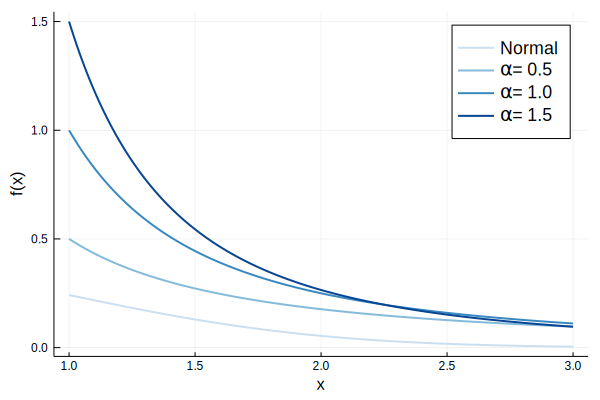

In [2]:
# Pareto Probability Density Functions Comparison Plot
X = [i/100 for i in 100:300]
N = pdf(Normal(), X)
P1 = pdf(Pareto(0.5,1), X)
P2 = pdf(Pareto(1,1), X)
P3 = pdf(Pareto(1.5,1), X)
pl1=plot(
    [X,X,X,X],
    [N, P1,P2,P3],
    lw = 2, 
    labels = ["Normal" "\\alpha = 0.5" "\\alpha = 1.0" "\\alpha = 1.5"],
    palette = p,
    #title = "Probability Density Functions", 
    legend = :topright,
    xlabel = "x",
    ylabel =  "f(x)", 
    legendfontsize=12)
display(pl1)
savefig(pl1, "Figures/pdf_comparison")

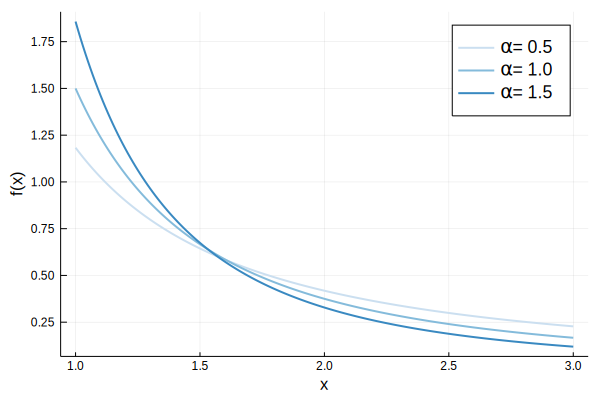

In [12]:
# Bounded Pareto Probability Density Functions Comparison Plot
paretopdf(a,L,H,x) = (a*(L^a)*(x^(-a-1)))/(1-(L/H)^a)
paretocdf(a,L,H,x) = (1-(L/x)^(a))/(1-(L/H)^a)
L = 1
H = 3
X = [i/100 for i in 100:300]
P1 = [paretopdf(0.5,L,H,x) for x in X]
P2 = [paretopdf(1,L,H,x) for x in X]
P3 = [paretopdf(1.5,L,H,x) for x in X]
pl2=plot(
    [X,X,X],
    [P1,P2,P3],
    lw = 2, 
    labels = ["\\alpha = 0.5" "\\alpha = 1.0" "\\alpha = 1.5"],
    palette = p,
    #title = "Probability Density Functions", 
    legend = :topright,
    xlabel = "x",
    ylabel =  "f(x)", 
    legendfontsize=12)
display(pl2)
savefig(pl2, "Figures/bounded_pdf_comparison")


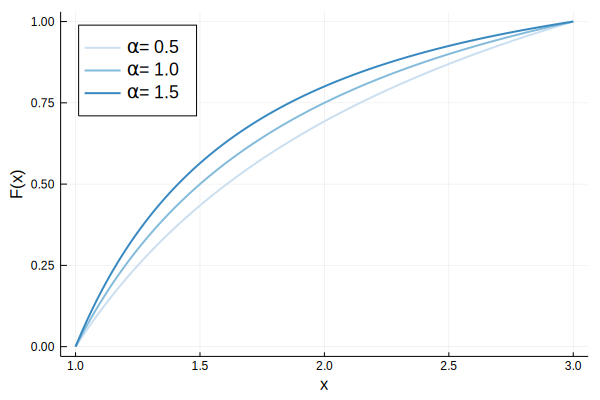

In [11]:
# Bounded Pareto Probability Density Functions Comparison Plot
paretopdf(a,L,H,x) = (a*(L^a)*(x^(-a-1)))/(1-(L/H)^a)
paretocdf(a,L,H,x) = (1-(L/x)^(a))/(1-(L/H)^a)
L = 1
H = 3
X = [i/100 for i in 100:300]
P1 = [paretocdf(0.5,L,H,x) for x in X]
P2 = [paretocdf(1,L,H,x) for x in X]
P3 = [paretocdf(1.5,L,H,x) for x in X]
pl2=plot(
    [X,X,X],
    [P1,P2,P3],
    lw = 2, 
    labels = ["\\alpha = 0.5" "\\alpha = 1.0" "\\alpha = 1.5"],
    palette = p,
    #title = "Probability Density Functions", 
    legend = :topleft,
    xlabel = "x",
    ylabel =  "F(x)", 
    legendfontsize=12)
display(pl2)
savefig(pl2, "Figures/bounded_cdf_comparison")

In [63]:
Companies = dropmissing(DataFrame(CSV.File("Data/company_info.csv")), ["EBIT", "STKCPA"])
Companies = Companies[:, ["EBIT","STKCPA"]]
Companies[:,"EBIT"] = convert.(Float64,Companies[:,"EBIT"])
Companies[:,"STKCPA"] = convert.(Float64,Companies[:,"STKCPA"])
Companies = filter(row -> row.EBIT > 0, Companies)
Companies = filter(row -> row.STKCPA > 0, Companies)
Companies = filter(row -> row.EBIT > row.STKCPA , Companies)
Companies = unique(Companies)
X = Companies[:,"STKCPA"]./Companies[:,"EBIT"]

1115-element Array{Float64,1}:
 0.1722488038277512
 0.07494866529774127
 0.10314523589269196
 0.0585544373284538
 0.0540891389009087
 0.02913752913752914
 0.01809185093551879
 0.005488345546643293
 0.014523263536458528
 0.030178579519343413
 0.0293604846678773
 0.03426441311931827
 0.025348996038792513
 ⋮
 0.04891981943250215
 0.0030678610872499693
 0.2626358763712869
 0.37825912555154434
 0.4326797385620915
 0.005894098684052253
 0.480117579815465
 0.012296341838303105
 0.0071281185518664416
 0.005656108597285068
 0.00446677833612507
 0.00472115668338743

In [ ]:
Companies

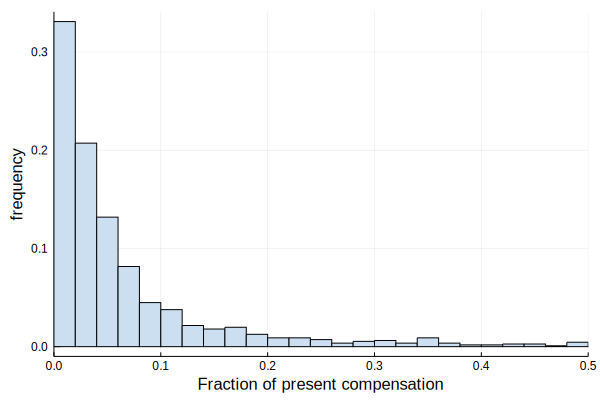

In [79]:
pl3 = histogram(X, bins = 50, normalize = :probability,
    xlims = (0,0.5),
    palette = p,
    legend = false,
    xlabel = "Fraction of present compensation",
    ylabel =  "frequency", 
    legendfontsize=12)
display(pl3)
savefig(pl3, "Figures/Compensation_hist")